# Bank Term Deposit Subscription Analysis and Prediction


This project analyzes a bank marketing dataset to predict whether a customer will subscribe to a term deposit.
We'll explore the data, build predictive models, and generate business insights to help the bank improve its campaign strategy.


## A. Data Understanding

# 1. Load the dataset and display the first few rows

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bankmarketing.csv")

In [203]:
df.head(2)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [204]:
df.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,no


# 2. Check dataset shape

In [201]:

print("Number of Rows",df.shape[0])
print("Number of Coloumns",df.shape[1])

Number of Rows 41188
Number of Coloumns 21


# 3. View column names and types

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 4. Summary statistics for numeric columns

In [10]:

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## B. Data Cleaning & Preparation

# 5. Check for missing values

In [11]:

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# 6. Handle duplicates or invalid values

In [12]:

df.duplicated().sum()

np.int64(12)

## C. Exploratory Data Analysis (EDA)


- 7. What percentage of people said “yes” vs “no”?  
- 8. How does age affect subscriptions?  
- 9. Which jobs/education levels have higher subscription rates?  
- 10. Do loans or housing affect decisions?  
- 11. Does month affect subscription?  
- 12. What's the impact of call duration?  
- 13. How does previous campaign outcome influence results?  


# 7. Calculate percentage of people who said "yes" vs "no"

In [39]:

target_counts = df['y'].value_counts()
target_percentages = df['y'].value_counts(normalize=True) * 100

for category in target_counts.index:
    print(f"{category}: {target_counts[category]} people ({target_percentages[category]:.1f}%)")

print(f"Class Imbalance Ratio: {target_counts.get('no', 0) / max(target_counts.get('yes', 1), 1):.1f}:1")


no: 36548 people (88.7%)
yes: 4640 people (11.3%)
Class Imbalance Ratio: 7.9:1


# 8. How does age affect subscriptions?

In [182]:

print("AGE vs SUBSCRIPTION ANALYSIS\n" + "=" * 40);

print("\n1. Age Stats:\n", df.groupby('y')['age'].describe()); print("\n2. Avg Age:\n", df.groupby('y')['age'].mean().round(1));

age_bins = [0, 25, 35, 45, 55, 65, 100]; labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']; 

age_dist = df.groupby(['y', pd.cut(df['age'], bins=age_bins, labels=labels)])['age'].count().unstack(fill_value=0); 

print("\n3. Age Group (%):\n", (age_dist.div(age_dist.sum(axis=1), axis=0) * 100).round(1))


AGE vs SUBSCRIPTION ANALYSIS

1. Age Stats:
        count  mean   std   min   25%   50%   75%   max
y                                                     
no  36548.00 39.91  9.90 17.00 32.00 38.00 47.00 95.00
yes  4640.00 40.91 13.84 17.00 31.00 37.00 50.00 98.00

2. Avg Age:
 y
no    39.90
yes   40.90
Name: age, dtype: float64

3. Age Group (%):
 age  18-25  26-35  36-45  46-55  56-65  65+
y                                          
no    3.60  35.90  32.20  20.60   6.90 0.90
yes   7.50  37.50  23.60  15.50   9.70 6.20


C:\Users\visha\AppData\Local\Temp\ipykernel_16208\2662013172.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df.groupby(['y', pd.cut(df['age'], bins=age_bins, labels=labels)])['age'].count().unstack(fill_value=0);


# 9. Which jobs/education levels have higher subscription rates?

C:\Users\visha\AppData\Local\Temp\ipykernel_16208\719672727.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, i].set_xticklabels(counts.index, rotation=45)
C:\Users\visha\AppData\Local\Temp\ipykernel_16208\719672727.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, i].set_xticklabels(counts.index, rotation=45)


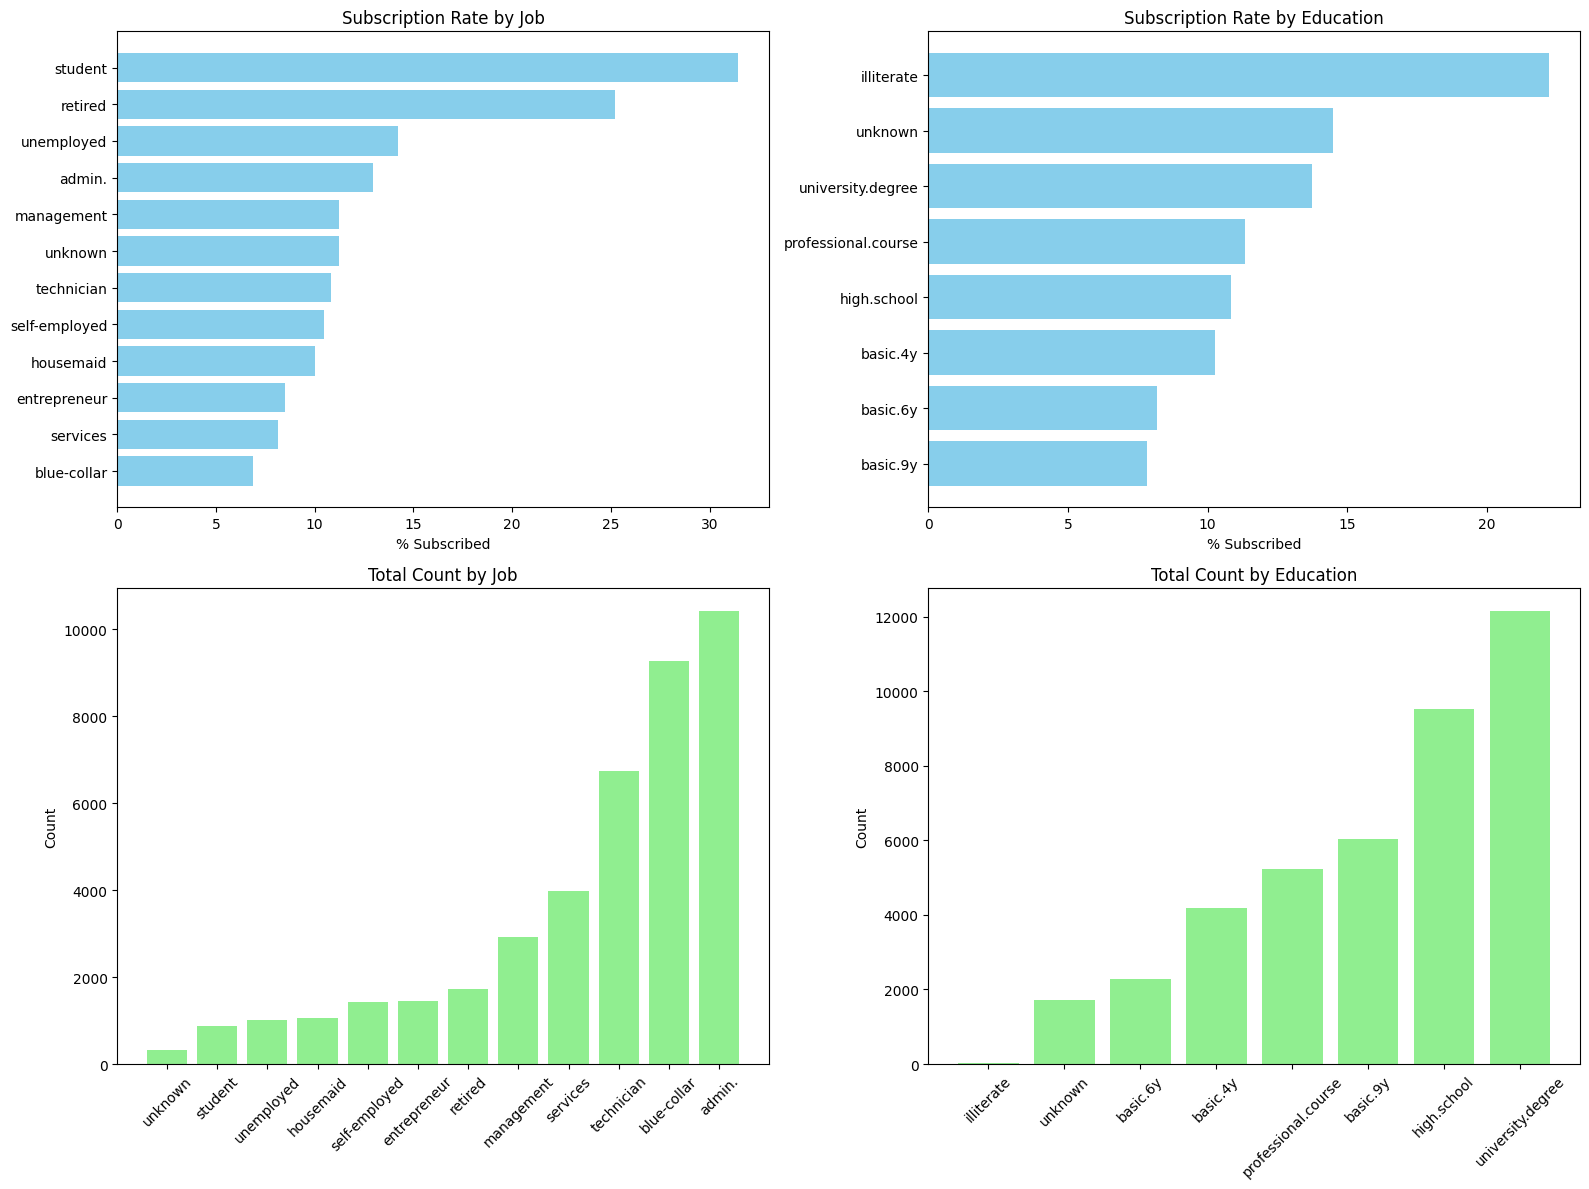

In [195]:


plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, col in enumerate(['job', 'education']):
    rates = df.groupby(col)['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values()
    counts = df[col].value_counts().sort_values()

    axes[0, i].barh(rates.index, rates.values, color='skyblue')
    axes[0, i].set_title(f'Subscription Rate by {col.capitalize()}')
    axes[0, i].set_xlabel('% Subscribed')

    axes[1, i].bar(counts.index, counts.values, color='lightgreen')
    axes[1, i].set_title(f'Total Count by {col.capitalize()}')
    axes[1, i].set_ylabel('Count')
    axes[1, i].set_xticklabels(counts.index, rotation=45)
    axes[1, i].set_xticks(range(len(counts)))  # Set tick positions
    axes[1, i].set_xticklabels(counts.index, rotation=45)  # Set labels


plt.tight_layout()
plt.show()


# 10. Do loans or housing affect decisions?

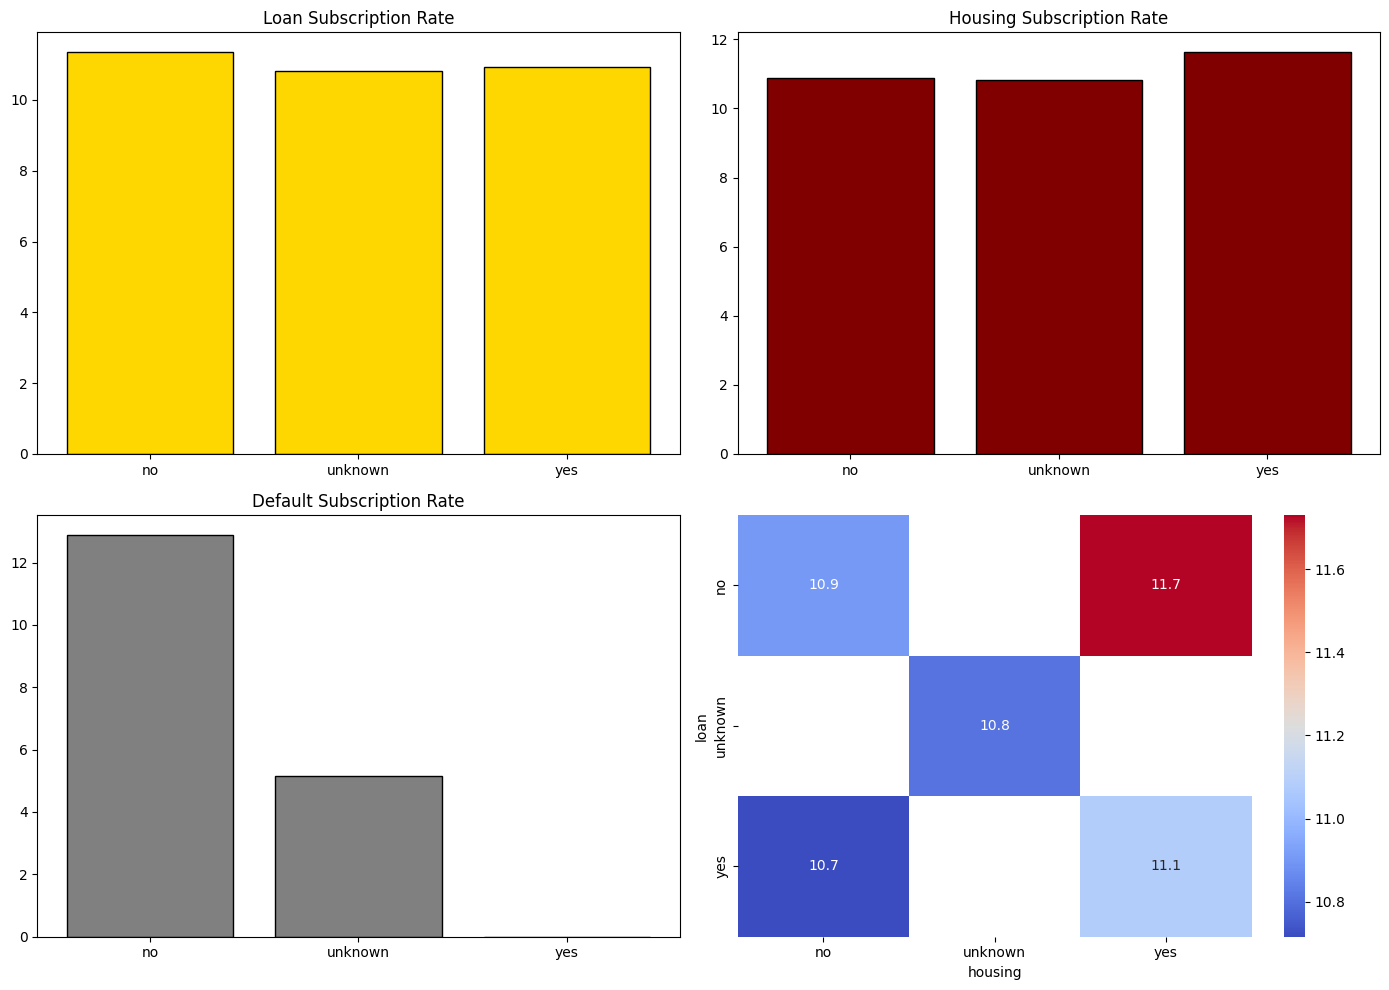

In [55]:
# Create comprehensive bar chart visualizations for loans and housing impact
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
categories = ['loan', 'housing', 'default']
colors = ['gold','Maroon','grey']  # RGB values for bars

for i, (col, color) in enumerate(zip(categories, colors)):
    rates = df.groupby(col)['y'].apply(lambda x: (x == 'yes').mean() * 100)
    axes[i//2, i%2].bar(rates.index, rates.values, color=color, edgecolor='black')
    axes[i//2, i%2].set_title(f'{col.capitalize()} Subscription Rate')

# Heatmap: Loan vs Housing Impact
sns.heatmap(df.groupby(['loan', 'housing'])['y'].apply(lambda x: (x == 'yes').mean() * 100).unstack(), 
            annot=True, fmt='.1f', cmap='coolwarm', ax=axes[1, 1])

plt.tight_layout()
plt.show()


# 11. What's the impact of call duration?

In [57]:
# Analyze month impact on subscription decisions


# Calculate subscription rates and contact volumes
month_analysis = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean() * 100).round(1)
month_counts = df['month'].value_counts().sort_index()

# Create summary table
summary_df = pd.DataFrame({
    'Subscription Rate (%)': month_analysis,
    'Contact Volume': month_counts
})

# Print table
print("MONTHLY SUBSCRIPTION ANALYSIS\n" + "=" * 30)
print(summary_df)

# Show range and difference
print("\nRANGE:", f"{month_analysis.max():.1f}% (highest) to {month_analysis.min():.1f}% (lowest)")
print("DIFFERENCE:", f"{month_analysis.max() - month_analysis.min():.1f} percentage points")


MONTHLY SUBSCRIPTION ANALYSIS
       Subscription Rate (%)  Contact Volume
month                                       
apr                     20.5            2632
aug                     10.6            6178
dec                     48.9             182
jul                      9.0            7174
jun                     10.5            5318
mar                     50.5             546
may                      6.4           13769
nov                     10.1            4101
oct                     43.9             718
sep                     44.9             570

RANGE: 50.5% (highest) to 6.4% (lowest)
DIFFERENCE: 44.1 percentage points


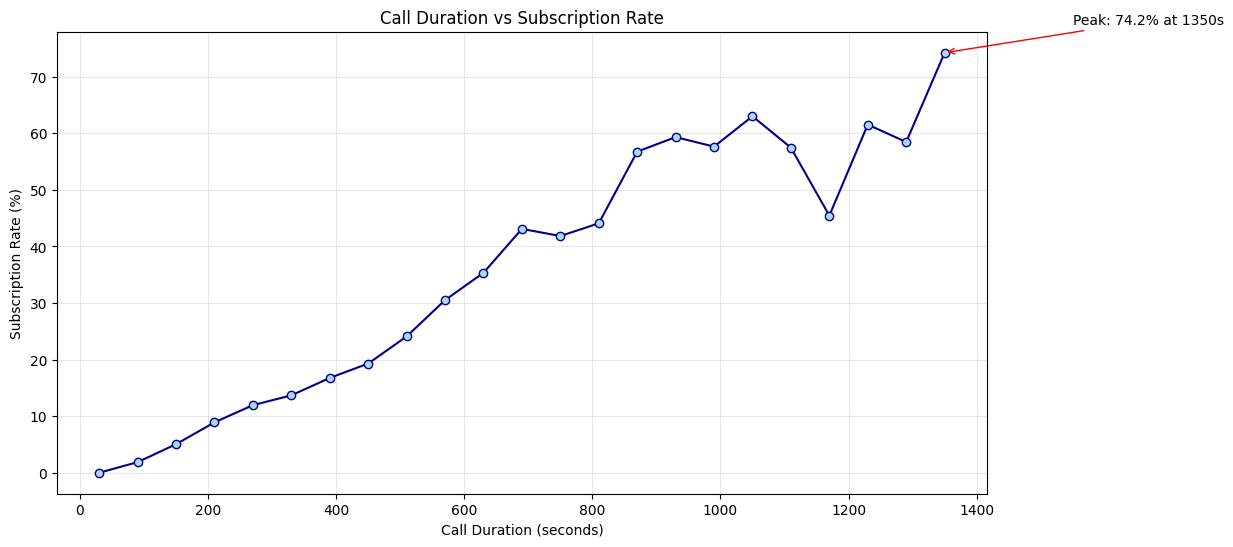

In [59]:
# Create line chart showing call duration impact on subscription rates
x = [interval.mid for interval in duration_analysis_filtered.index]
y = duration_analysis_filtered['Subscription_Rate_%'].values

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', color='darkblue', markerfacecolor='lightblue')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Subscription Rate (%)')
plt.title('Call Duration vs Subscription Rate')
plt.grid(True, alpha=0.3)

# Highlight peak
peak_idx = np.argmax(y)
plt.annotate(f'Peak: {y[peak_idx]:.1f}% at {x[peak_idx]:.0f}s', 
             xy=(x[peak_idx], y[peak_idx]), xytext=(x[peak_idx] + 200, y[peak_idx] + 5),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

# 12. How does previous campaign outcome influence results?

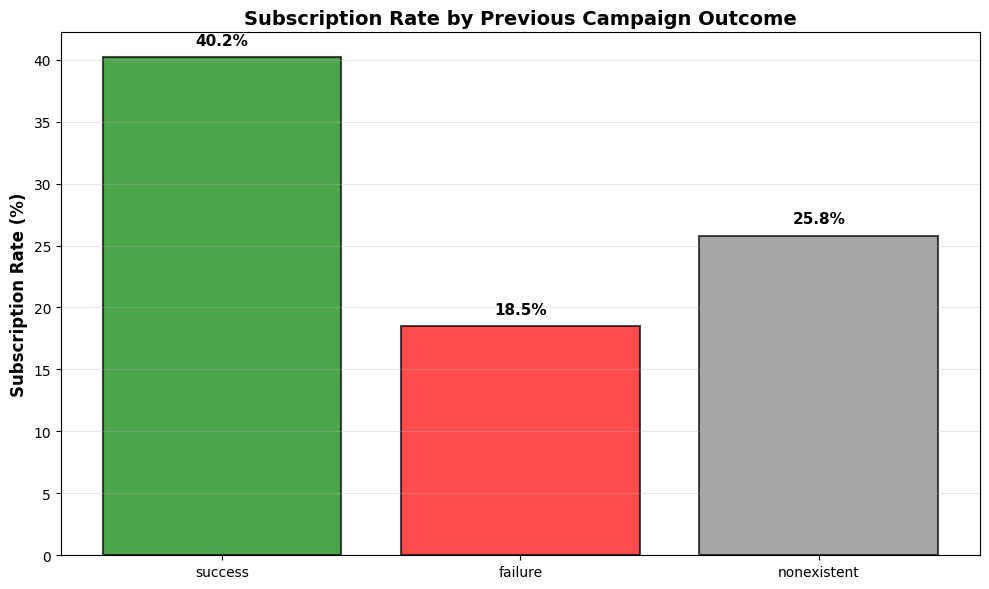

In [36]:
# Create only the bar chart for previous campaign outcomes
plt.figure(figsize=(10, 6))

outcomes = ['success', 'failure', 'nonexistent']
rates = [poutcome_rates[outcome] for outcome in outcomes]
colors = ['green', 'red', 'gray']

plt.bar(outcomes, rates, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.ylabel('Subscription Rate (%)', fontsize=12, fontweight='bold')
plt.title('Subscription Rate by Previous Campaign Outcome', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

## D. Predictive Modeling


# 13. Define target variable and features



In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('bankmarketing.csv')
num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = [c for c in num if c in df.columns]
cat_cols = [c for c in cat if c in df.columns]
X, y = df[num_cols + cat_cols], df['y']

preproc = ColumnTransformer([('num', StandardScaler(), num_cols),
                             ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])
model = Pipeline([('preproc', preproc),
                  ('clf', RandomForestClassifier(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.65      0.43      0.52       928

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy: 0.9104151493080845


# 18. Split data into train/test sets

In [194]:
# 18. Split data into train/test sets


# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shape of the splits to verify the operation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())



X_train shape: (32950, 20)
X_test shape: (8238, 20)
y_train distribution:
 y
no     29238
yes     3712
Name: count, dtype: int64
y_test distribution:
 y
no     7310
yes     928
Name: count, dtype: int64


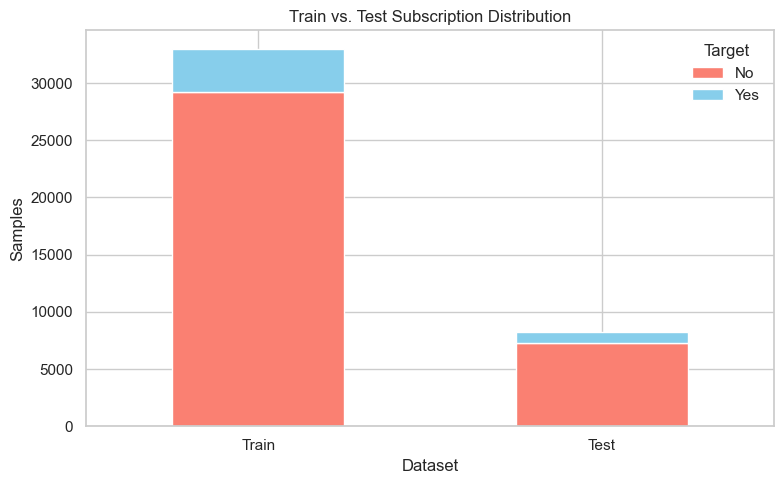

In [188]:


# Create DataFrame for counts
dist_df = pd.DataFrame({'Train': y_train.value_counts(), 'Test': y_test.value_counts()}).T

# Plot stacked bar chart
dist_df.plot(kind='bar', stacked=True, figsize=(8, 5), color=['salmon', 'skyblue'])
plt.title("Train vs. Test Subscription Distribution")
plt.ylabel("Samples")
plt.xlabel("Dataset")
plt.legend(title="Target", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


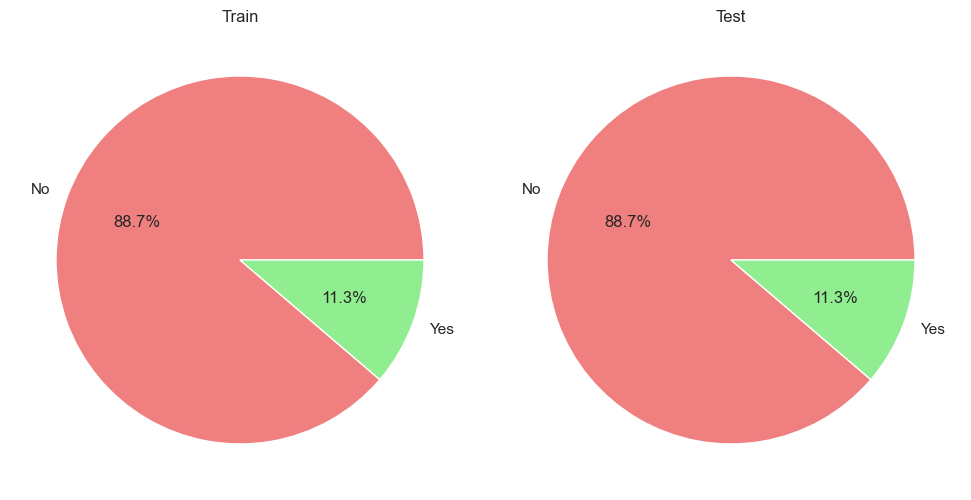

In [191]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

for ax, data, title in zip(axs, [y_train, y_test], ["Train", "Test"]):  
    ax.pie(data.value_counts(), labels=["No", "Yes"], autopct="%1.1f%%", colors=["lightcoral", "lightgreen"])  
    ax.set_title(title)  

plt.tight_layout()  
plt.show()


# 19. Train models: Logistic Regression, Decision Tree, Random Forest, etc.

In [187]:



# Load dataset and split into features and target
df = pd.read_csv('bankmarketing.csv')
X, y = df.drop('y', axis=1), df['y']

# Identify numerical and categorical columns
num = X.select_dtypes(include=['number']).columns
cat = X.select_dtypes(include=['object']).columns

# Preprocessing: scale numbers and one-hot encode strings
pre = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
])

# Pipeline: preprocessing then Logistic Regression
clf = Pipeline([('pre', pre), ('model', LogisticRegression(max_iter=1000, random_state=42))])

# Split, train, and evaluate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7310
         yes       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238

Accuracy: 0.9166059723233795


## E. Business Insights


- 20. Which customers are most likely to subscribe?
- 21. Which month has the most success rate? 
   
- 22. Which campaigns strategies is the most success?  
- 23. Should calls be longer or shorter?  
- 24. Who should the bank Upcoming target coustomer's?  


# 20. Which customers are most likely to subscribe?

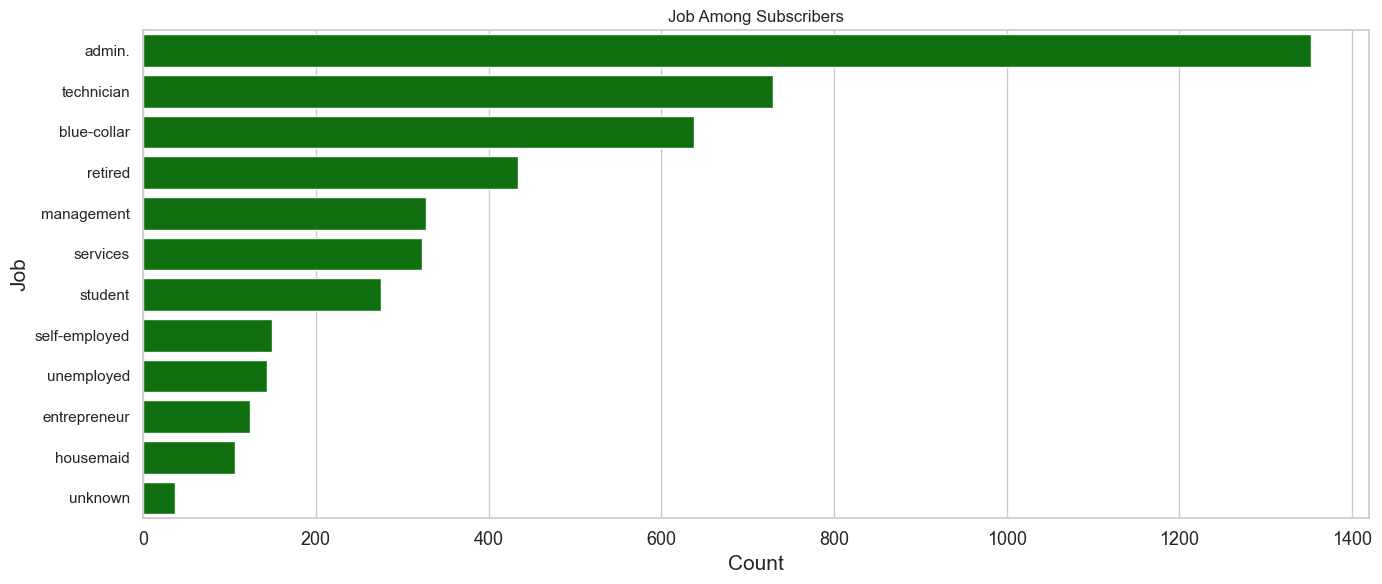

In [170]:

# Visualize categorical features
for feature in ['job']:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=subscribed, y=feature, order=subscribed[feature].value_counts().index,color='green')
    plt.title("Subscribers by Job", fontsize=15)
    plt.xlabel("Count", fontsize=15)
    plt.ylabel("Job", fontsize=15)
    plt.xticks(fontsize=13)
    plt.title(f"{feature.capitalize()} Among Subscribers")
    plt.tight_layout()
    plt.show()



# 21. Which month has the most success rate? 

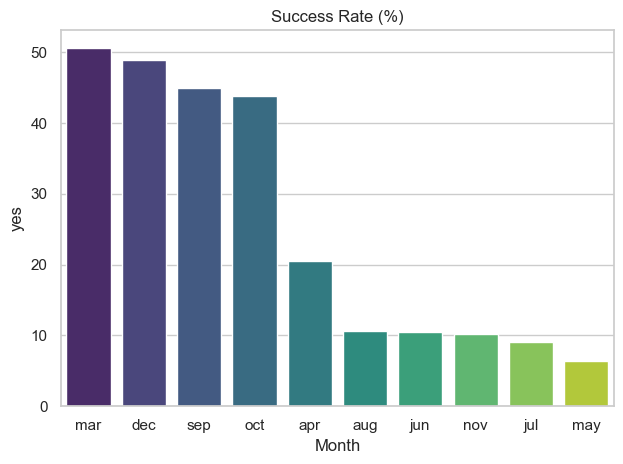

In [126]:


# Compute monthly success rates
monthly_data = df.groupby('month')['y'].value_counts(normalize=True).unstack().mul(100).fillna(0)
monthly_data = monthly_data.sort_values('yes', ascending=False)

# Plot
sns.barplot(x=monthly_data.index, y=monthly_data['yes'], palette='viridis', hue=monthly_data.index, legend=False)
plt.title("Success Rate (%)")
plt.xlabel("Month")

plt.tight_layout()
plt.show()


In [100]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


# 22. Which campaigns strategies is the most success?

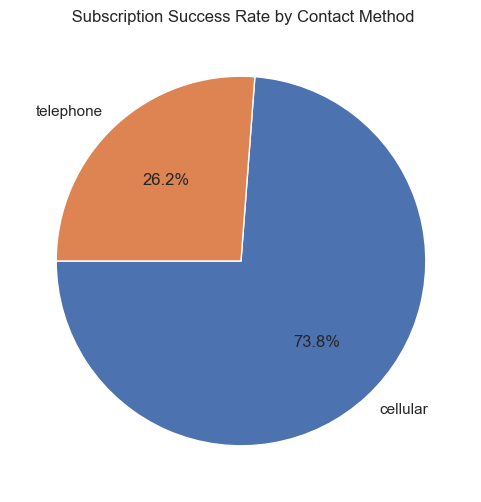

In [125]:
# Calculate success rate by contact method
contact_success = df[df['y'] == 'yes']['contact'].value_counts()
contact_total = df['contact'].value_counts()
contact_success_rate = (contact_success / contact_total) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(contact_success_rate, labels=contact_success_rate.index, autopct='%1.1f%%', startangle=180)
plt.title(" Subscription Success Rate by Contact Method")

plt.show()


# 23. Should calls be longer or shorter?

Avg Call Duration:
Subscribed: 553.19 sec
Not Subscribed: 220.84 sec


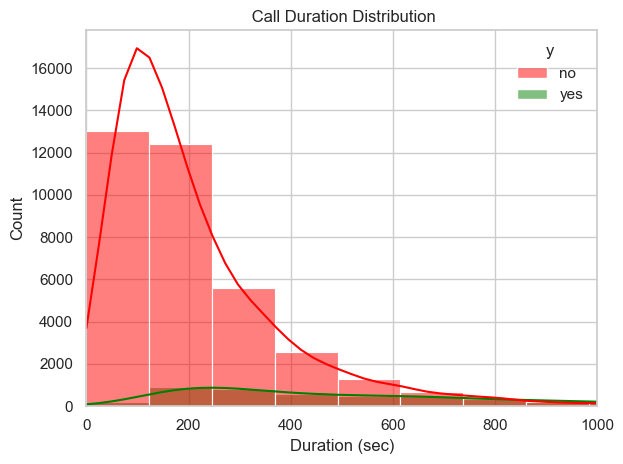

In [141]:

# Compare call duration
print(f"Avg Call Duration:\nSubscribed: {df[df['y']=='yes']['duration'].mean():.2f} sec\nNot Subscribed: {df[df['y']=='no']['duration'].mean():.2f} sec")

# Plot distribution
sns.histplot(df, x='duration', hue='y', bins=40, kde=True, palette={'yes': 'green', 'no': 'red'})
plt.title(" Call Duration Distribution")
plt.xlabel("Duration (sec)")
plt.ylabel("Count")
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()


# 24. Who should the bank Upcoming target coustomer's?  

 Subscription Rate by Job:
 job
student         31.43
retired         25.23
unemployed      14.20
admin.          12.97
management      11.22
unknown         11.21
technician      10.83
self-employed   10.49
housemaid       10.00
entrepreneur     8.52
services         8.14
blue-collar      6.89
Name: yes, dtype: float64


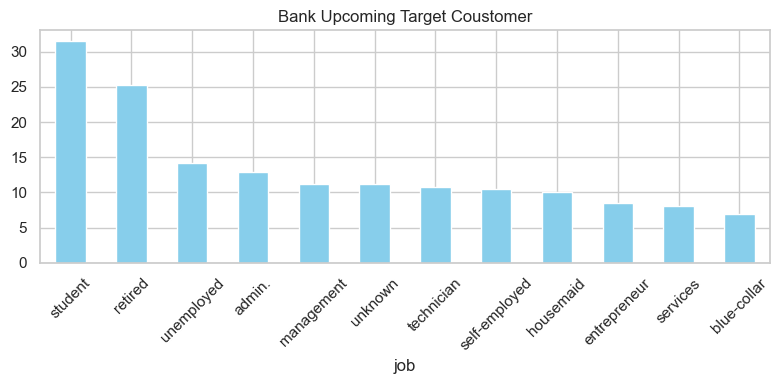

In [146]:


# Subscription rate by job
rates = df.groupby('job')['y'].value_counts(normalize=True).unstack()['yes'].mul(100).sort_values(ascending=False)

print(" Subscription Rate by Job:\n", rates)

# Plot
rates.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title("Bank Upcoming Target Coustomer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
